In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense,BatchNormalization,Dropout
from tensorflow.python.client import device_lib
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau



ModuleNotFoundError: No module named 'pandas'

In [ ]:
InputPath = []
label = []
sourceFileDir = os.path.dirname(os.path.abspath("__file__"))
print(sourceFileDir)
for Class in os.listdir(os.path.join(sourceFileDir,"Emotions")):
    print(Class)
    for path in os.listdir(os.path.join(sourceFileDir,"Emotions",Class)):
        if Class == 'happy':
            label.append(0)
        elif Class == 'neutral':
            label.append(1)
        elif Class == 'sad':
            label.append(2)
        else:
            label.append(3)
        InputPath.append(os.path.join("Emotions", Class, path))
print(label)



/home/abdulrahman/EmotionDetector
happy
angry
neutral
sad
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df = pd.DataFrame()
df['images'] = InputPath
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,Emotions/happy/21292.jpg,0
1,Emotions/happy/25656.jpg,0
2,Emotions/angry/10240.jpg,3
3,Emotions/sad/30659.jpg,2
4,Emotions/happy/31644.jpg,0


In [3]:
import seaborn as sns
sns.countplot(data=df,x='label')

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df["label"]

0        0
1        0
2        3
3        2
4        0
        ..
26212    2
26213    2
26214    3
26215    3
26216    2
Name: label, Length: 26217, dtype: int64

In [ ]:
df['label'] = df['label'].astype('str')

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=1)


In [ ]:
TrainGenerator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
ValGenerator = ImageDataGenerator(rescale = 1./255)

TrainIterator = TrainGenerator.flow_from_dataframe(
    df, 
    x_col='images', 
    y_col='label', 
    target_size=(48,48), 
    batch_size=64, 
    class_mode='categorical'
)
ValIterator = ValGenerator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(48,48), 
    batch_size=32, 
    class_mode='categorical'
)

Found 26217 validated image filenames belonging to 4 classes.
Found 5244 validated image filenames belonging to 4 classes.


In [ ]:
model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(48,48,3)),
                    MaxPool2D((4,4)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(128, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dropout(0.2),
                    Dense(256, activation='relu'),
                    Dropout(0.2),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(4, activation='softmax'),
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.05)
              , loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 11, 11, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)          9280      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 128)        

In [ ]:
history = model.fit(TrainIterator, epochs=100, validation_data=ValIterator
                    ,callbacks = ReduceLROnPlateau(monitor='val_loss'
                                                   , factor=np.sqrt(0.1), patience=5))


Epoch 1/100


2023-12-22 21:18:43.141051: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-22 21:18:43.650004: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-22 21:18:45.227320: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-22 21:18:47.023625: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3130d2c860 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-22 21:18:47.023765: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2023-12-22 21:18:47.078149: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1703272727.392963  201980 de

410/410 [==============================] - 65s 131ms/step - loss: 6.0844 - accuracy: 0.3377 - val_loss: 1.3670 - val_accuracy: 0.3343 - lr: 0.0500
Epoch 2/100
410/410 [==============================] - 43s 105ms/step - loss: 1.3639 - accuracy: 0.3429 - val_loss: 1.3702 - val_accuracy: 0.3343 - lr: 0.0500
Epoch 3/100
410/410 [==============================] - 47s 114ms/step - loss: 1.3635 - accuracy: 0.3428 - val_loss: 1.3700 - val_accuracy: 0.3343 - lr: 0.0500
Epoch 4/100
410/410 [==============================] - 49s 118ms/step - loss: 1.3635 - accuracy: 0.3429 - val_loss: 1.3694 - val_accuracy: 0.3343 - lr: 0.0500
Epoch 5/100
410/410 [==============================] - 44s 107ms/step - loss: 1.3646 - accuracy: 0.3429 - val_loss: 1.3686 - val_accuracy: 0.3343 - lr: 0.0500
Epoch 6/100
410/410 [==============================] - 43s 105ms/step - loss: 1.3638 - accuracy: 0.3412 - val_loss: 1.3678 - val_accuracy: 0.3343 - lr: 0.0500
Epoch 7/100
410/410 [==============================] - 43s

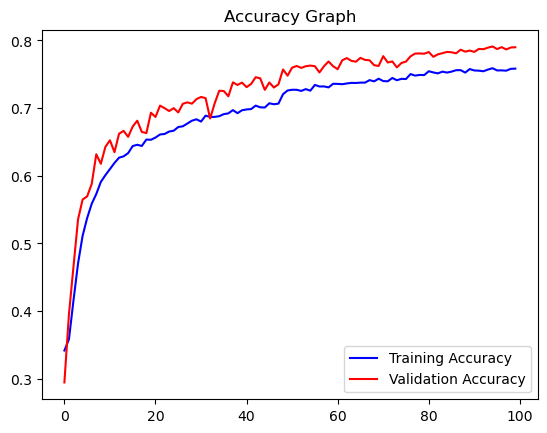

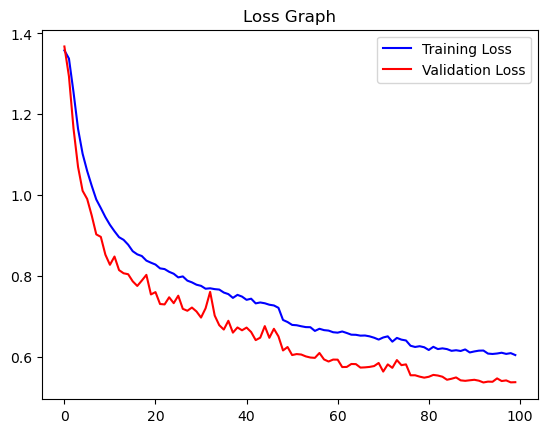

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
image_path = "happy 61.jpeg" # path of the image
img = load_img(image_path, target_size=(48, 48))
img = np.array(img)
img = img / 255.0 # normalize the image
img = img.reshape(1, 48, 48, 3) # reshape for prediction
pred = model.predict(img)
print(pred[0])


1/1 [==============================] - 1s 1s/step
[0.28614753 0.25463942 0.4017034  0.05750961]


In [ ]:
model.save("Emotions6.h5")
model.save("Emotions6.keras")
""" from keras.models import load_model

model = load_model('my_model.sh5')
model.summary() """

/home/abdulrahman/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


" from keras.models import load_model\n\nmodel = load_model('my_model.sh5')\nmodel.summary() "